In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
train_df = pd.read_csv('loan-train.csv')

In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [53]:
cat = ['Gender', 'Married', 'Self_Employed', 'Property_Area', 'Education', 'Dependents', 'Credit_History']

In [54]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [55]:
train_df.head().to_csv('head.csv')

e:\data\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-56-883dba177607>:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "palette" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('targets.jpg', palette = 'rainbow_r')


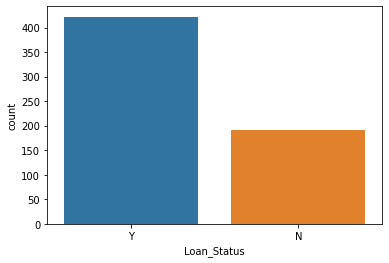

In [56]:
sns.countplot(train_df.Loan_Status)
plt.savefig('targets.jpg', palette = 'rainbow_r')

In [57]:
train_df.describe().to_csv('describe.csv')
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [58]:
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

e:\data\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
e:\data\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
e:\data\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
e:\data\python39\lib\site-packages\seaborn\_decorators.

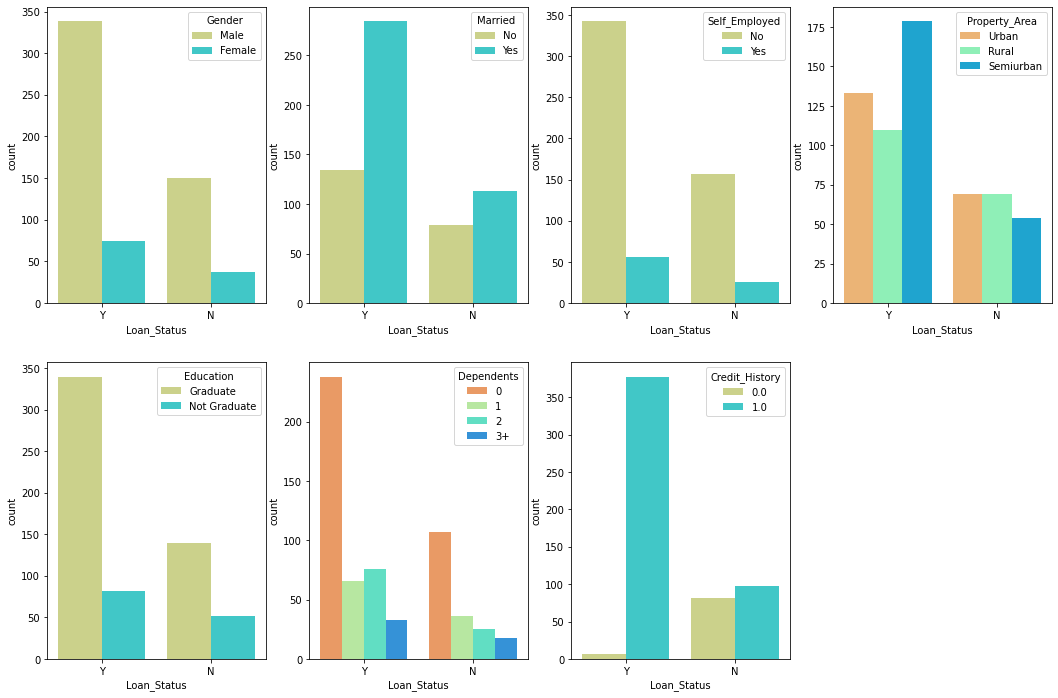

In [59]:
plt.figure(figsize = (18,12))
c = 1
for col in cat:
    plt.subplot(2, 4, c)
    sns.countplot(train_df['Loan_Status'], hue = train_df[col], palette = 'rainbow_r')
    c += 1
plt.savefig('countplots.png')

In [60]:
train_df['Credit_History'].fillna(train_df['Credit_History'].mode(), inplace=True) # Mode
train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean(), inplace=True) # Mean
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode(), inplace=True)
train_df.Loan_Status = train_df.Loan_Status.replace({"Y": 1, "N" : 0})

train_df.Gender = train_df.Gender.replace({"Male": 1, "Female" : 0})

train_df.Married = train_df.Married.replace({"Yes": 1, "No" : 0})

train_df.Self_Employed = train_df.Self_Employed.replace({"Yes": 1, "No" : 0})

train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)

train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)

train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)

train_df['Credit_History'].fillna(train_df['Credit_History'].mean(), inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode(), inplace=True)

In [61]:

from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    train_df[col] = le.fit_transform(train_df[col])


In [72]:
train_df.dropna(inplace = True)

e:\data\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


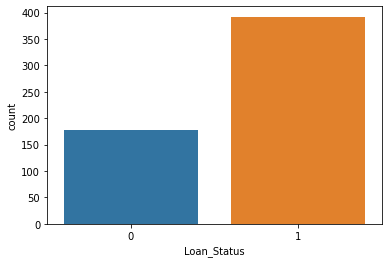

In [73]:
sns.countplot(train_df.Loan_Status)
plt.savefig('targets.jpg')

In [74]:
train_df.Loan_Status.value_counts()

1    392
0    177
Name: Loan_Status, dtype: int64

In [75]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            569 non-null    object 
 1   Gender             569 non-null    float64
 2   Married            569 non-null    float64
 3   Dependents         569 non-null    int32  
 4   Education          569 non-null    int32  
 5   Self_Employed      569 non-null    float64
 6   ApplicantIncome    569 non-null    int64  
 7   CoapplicantIncome  569 non-null    float64
 8   LoanAmount         569 non-null    float64
 9   Loan_Amount_Term   569 non-null    float64
 10  Credit_History     569 non-null    float64
 11  Property_Area      569 non-null    int32  
 12  Loan_Status        569 non-null    int64  
dtypes: float64(7), int32(3), int64(2), object(1)
memory usage: 71.7+ KB


In [76]:
train_df[train_df.corr()>0.5].sum()

Loan_ID                0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: object

In [77]:
from sklearn.model_selection import train_test_split
X = train_df.drop(['Loan_ID','Loan_Status'], axis = 1)
y = train_df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)

In [78]:
X_train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred, y_test))
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(classifier.predict(X_train), y_train))

The accuracy of Logistic Regression is:  0.8181818181818182
The accuracy of Logistic Regression is:  0.8028169014084507


In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[19, 24],
       [ 2, 98]], dtype=int64)

In [108]:
## from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('The accuracy of KNN is: ', metrics.accuracy_score(y_pred, y_test))
print(confusion_matrix(y_test, y_pred))
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(classifier.predict(X_train), y_train))

The accuracy of KNN is:  0.8041958041958042
[[17 26]
 [ 2 98]]
The accuracy of Logistic Regression is:  0.8028169014084507


In [109]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
classifier = DecisionTreeClassifier(max_depth = 3,criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('The accuracy of Decision Tree Classifier is: ', metrics.accuracy_score(y_pred, y_test))
print(confusion_matrix(y_test, y_pred))
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(classifier.predict(X_train), y_train))

The accuracy of Decision Tree Classifier is:  0.8181818181818182
[[20 23]
 [ 3 97]]
The accuracy of Logistic Regression is:  0.8145539906103286


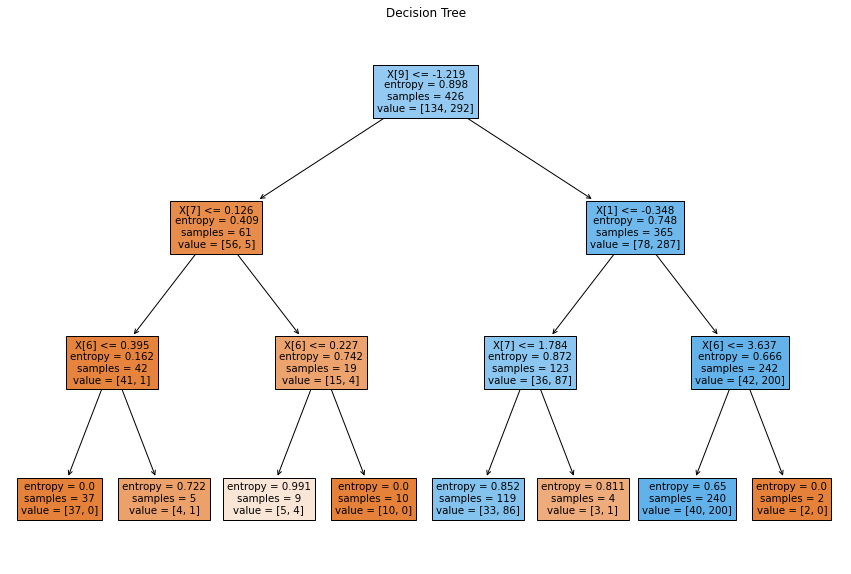

In [111]:
plt.figure(figsize= (15,10))
plot_tree(classifier,filled=True);
plt.title('Decision Tree')
plt.savefig('DT2.png')